In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
k = len(set(y_train))
print("number of classes:", k)

number of classes: 10


In [8]:
# Build the model using functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
# Dense layers NN design commences here
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x) # Output layer

# Once we have the variable representing the input "i"
# and the variable representing the output "x",
# we can pass these into the Model() constructor

model = Model(i,x)

In [9]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5371 - accuracy: 0.4368 - val_loss: 1.2527 - val_accuracy: 0.5421
Epoch 2/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2447 - accuracy: 0.5533 - val_loss: 1.0720 - val_accuracy: 0.6138
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1206 - accuracy: 0.5998 - val_loss: 1.0318 - val_accuracy: 0.6313
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0220 - accuracy: 0.6341 - val_loss: 0.9506 - val_accuracy: 0.6679
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9482 - accuracy: 0.6641 - val_loss: 0.9047 - val_accuracy: 0.6788
Epoch 6/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8863 - accuracy: 0.6855 - val_loss: 0.8872 - val_accuracy: 0.6855
Epoch 7/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8311 - accuracy: 0.7031 - val_loss: 0.8595 -

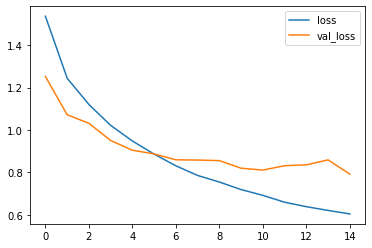

In [10]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

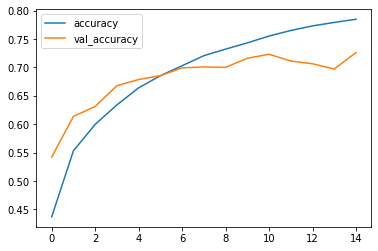

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[769  18  35  10  24   2   8  17  77  40]
 [ 12 828   1   3   7   1   7   3  24 114]
 [ 77   6 558  49 110  56  83  29  14  18]
 [ 28  12  50 477  89 177  82  41  16  28]
 [ 25   1  39  46 731  28  51  58  13   8]
 [ 14   3  33 168  71 607  30  54   6  14]
 [  4   7  31  49  32  18 834   6   6  13]
 [ 12   4  17  25  61  43  13 797   5  23]
 [ 58  43   8  10  12   4   3   6 822  34]
 [ 28  69   6   6   5   6   7  11  23 839]]


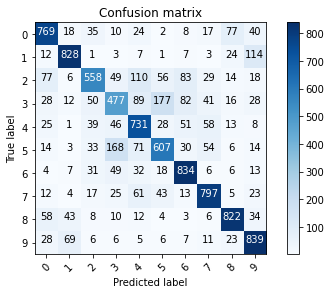

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [13]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

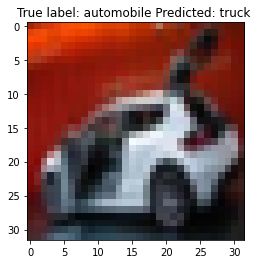

In [14]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

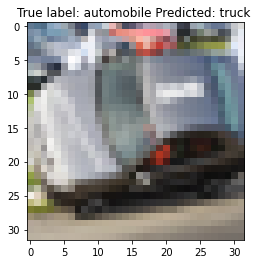

In [15]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

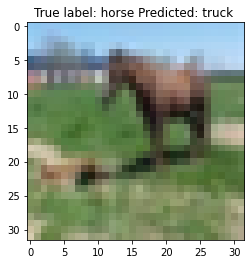

In [16]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

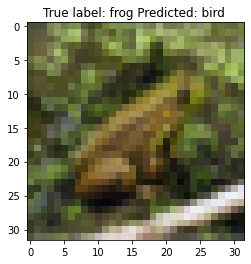

In [17]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));